**Bagging Decision Tree Algorithm**

In [0]:
import pandas as pd

from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

data = pd.read_csv('https://raw.githubusercontent.com/innoraj/Project/master/Dataset1.csv')

X = data.iloc[:,0:12]  # Independent Variables
Y = data.iloc[:,-1]    # Target Variable

In [0]:
kfold = model_selection.KFold(n_splits=10, random_state=5)

cart = DecisionTreeClassifier()

model = BaggingClassifier(base_estimator=cart, n_estimators=100, random_state=5)

results = model_selection.cross_val_score(model, X, Y, cv=kfold)

print("Accuracy - ", results.mean()*100)

BaggingDecisionTree = results.mean()*100

Accuracy -  71.38571428571429


**Random Forest Algorithm**

In [0]:
kfold = model_selection.KFold(n_splits=10, random_state=5)

model = RandomForestClassifier(n_estimators=100, max_features=3)

results = model_selection.cross_val_score(model, X, Y, cv=kfold)

print("Accuracy - ",results.mean()*100)

RandomForest = results.mean()*100

Accuracy -  72.37571428571428


**Extra Trees Algorithm**

In [0]:
kfold = model_selection.KFold(n_splits=10, random_state=5)

model = ExtraTreesClassifier(n_estimators=100, max_features=7)

results = model_selection.cross_val_score(model, X, Y, cv=kfold)

print("Accuracy - ",results.mean()*100)

ExtraTrees = results.mean()*100

Accuracy -  71.1842857142857


**Boosting Algorithm**

In [0]:
kfold = model_selection.KFold(n_splits=10, random_state=5)

model = AdaBoostClassifier(n_estimators=30, random_state=5)

results = model_selection.cross_val_score(model, X, Y, cv=kfold)

print("Accuracy - ", results.mean()*100)

AdaBoost = results.mean()*100

Accuracy -  72.86142857142856


**Ada Boost**

**Stochastic Gradient Boosting**

In [0]:
kfold = model_selection.KFold(n_splits=10, random_state=5)

model = GradientBoostingClassifier(n_estimators=100, random_state=5)

results = model_selection.cross_val_score(model, X, Y, cv=kfold)

print("Accuracy - ",results.mean()*100)

StochasticGradientBoosting = results.mean()*100

Accuracy -  73.5142857142857


**Voting Ensemble**

In [0]:
kfold = model_selection.KFold(n_splits=10, random_state=5)

estimators = []

model_1 = LogisticRegression()
estimators.append(('logistic', model_1))

model_2 = DecisionTreeClassifier()
estimators.append(('cart', model_2))

model_3 = SVC()
estimators.append(('svm', model_3))

ensemble = VotingClassifier(estimators)
results = model_selection.cross_val_score(ensemble, X, Y, cv=kfold)

print("Accuracy - ",results.mean()*100)

VotingEnsemble = results.mean()*100

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", Futur

Accuracy -  66.67714285714285


**Ensemble Models**

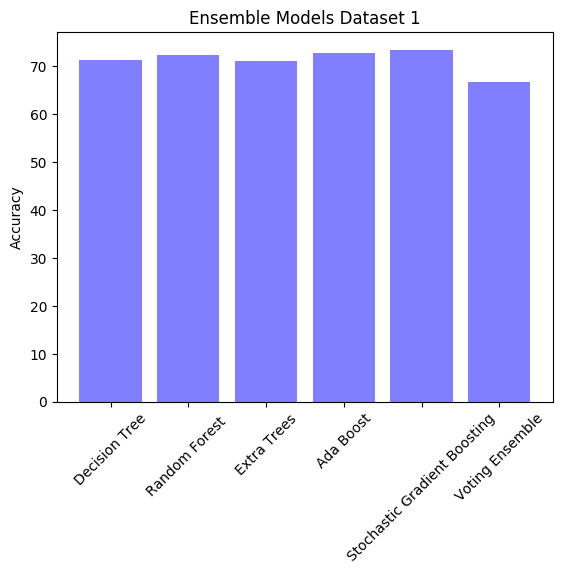

<Figure size 640x480 with 0 Axes>

In [0]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
objects = ('Decision Tree','Random Forest ','Extra Trees','Ada Boost','Stochastic Gradient Boosting','Voting Ensemble')
y_pos = np.arange(len(objects))
performance = [BaggingDecisionTree, RandomForest , ExtraTrees, AdaBoost, StochasticGradientBoosting, VotingEnsemble]
plt.bar(y_pos, performance, align='center', alpha=0.5,color='blue') 
plt.xticks(y_pos, objects,rotation=45)
plt.ylabel('Accuracy')
plt.title('Ensemble Models Dataset 1')
plt.show()
plt.savefig("Accuracy Ensemble Models Dataset 1.png")
files.download("Accuracy Ensemble Models Dataset 1.png")

In [0]:
results = pd.DataFrame({'Model': ['Decision Tree','Random Forest','Extra Trees','Ada Boost','Stochastic Gradient Boosting','Voting Ensemble'],
                        'Accuracy': [BaggingDecisionTree, RandomForest , ExtraTrees, AdaBoost, StochasticGradientBoosting, VotingEnsemble]})
result_df = results.sort_values(by='Accuracy', ascending=False)
result_df = result_df.set_index('Accuracy')
result_df.head(8)

,Model
Accuracy,
73.514286,Stochastic Gradient Boosting
72.861429,Ada Boost
72.375714,Random Forest
71.385714,Decision Tree
71.184286,Extra Trees
66.677143,Voting Ensemble
